# Proyek Analisis Data: Bike Sharing Dataset
- Nama:ERIKA BUDIARTI
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana hari dan jam mempengaruhi permintaan sewa sepeda?
- Pertanyaan 2 : Bagaimana cuaca dan musim mempengaruhi permintaan sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset ini menampilkan data harian untuk penyewaan sepeda dengan fokus pada faktor cuaca dan kalender.
- Kolom seperti temp, atemp, hum, dan windspeed dinormalisasi ke nilai antara 0 dan 1, yang mempermudah algoritma untuk menangani data tersebut.
- Jumlah penyewaan sepeda (cnt) dibagi menjadi pengguna casual dan registered, memungkinkan analisis perilaku pengguna.
- Fitur seperti holiday, workingday, dan weathersit dikodekan sebagai variabel kategorikal, yang dapat memengaruhi jumlah penyewaan.

In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini mencakup data penyewaan sepeda per jam dengan variabel yang menggambarkan kondisi cuaca dan kalender.
- Kolom seperti temp, atemp, hum, dan windspeed dinormalisasi untuk memudahkan analisis.
- cnt (total penyewaan sepeda) dapat digunakan untuk analisis tren penggunaan sepeda berdasarkan waktu, misalnya jam sibuk atau pengaruh kondisi cuaca terhadap jumlah penyewaan.
- Variabel seperti hr dan workingday memungkinkan analisis yang lebih mendalam, misalnya bagaimana penggunaan sepeda bervariasi sepanjang hari atau di antara hari kerja dan akhir pekan/libur.


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset ini memiliki 731 baris dan 16 kolom.
- Semua kolom tidak memiliki nilai null, yang berarti dataset ini lengkap dan tidak memerlukan penanganan data yang hilang.
- Terdapat 11 kolom dengan tipe data int64, yang berisi data numerik dan kategorikal, seperti kolom season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, dan cnt.
- Ada 4 kolom dengan tipe data float64, yaitu temp, atemp, hum, dan windspeed, yang merupakan nilai numerik dengan desimal.
- Kolom dteday bertipe object, merupakan tanggal dalam format string.

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

- Dataset ini memiliki 17.379 baris dan 17 kolom.
- Semua kolom tidak memiliki nilai null, yang berarti dataset ini lengkap dan tidak memerlukan penanganan data yang hilang.
- Terdapat 12 kolom dengan tipe data int64, yang berisi data numerik dan kategorikal, seperti kolom season, yr, mnth, hr, holiday, weekday, workingday, weathersit, casual, registered, dan cnt.
- Ada 4 kolom dengan tipe data float64, yaitu temp, atemp, hum, dan windspeed, yang merupakan nilai numerik dengan desimal.
- Kolom dteday bertipe object, merupakan tanggal dalam format string.

### Cleaning Data

In [6]:
datetime_columns = ['dteday']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column]).dt.date
  hour_df[column] = pd.to_datetime(hour_df[column]).dt.date

**Insight:**
- Mengubah tipe data kolom 'dteday' dari object menjadi datetime
- Tidak perlu melakukan pembersihan data karena dataset tidak memiliki missing value

## Exploratory Data Analysis (EDA)

### Explore table day_df dan hour_df

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Jumlah (count): Terdapat 731 catatan untuk setiap fitur numerik, menunjukkan data harian selama kurang lebih dua tahun.
- Rata-rata (mean): Rata-rata penyewaan sepeda harian (cnt) adalah sekitar 4504, dengan pengguna registered berkontribusi lebih banyak daripada pengguna casual.
- Minimum dan Maksimum (min & max): Penyewaan harian berkisar antara 22 hingga 8714, menunjukkan variabilitas yang signifikan dalam permintaan.
- Deviasi Standar (std): Deviasi standar yang relatif tinggi untuk casual dan registered menunjukkan fluktuasi dalam penyewaan harian untuk tipe pengguna ini.
- Persentil (25%, 50% & 75%): Persentil ke-50 (median) untuk penyewa harian (cnt) mendekati rata-rata, menunjukkan distribusi yang kurang lebih simetris.

In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah (count): Terdapat 17379 catatan untuk setiap fitur numerik, menunjukkan data per jam dalam periode yang lebih panjang.
- Rata-rata (mean) : Rata-rata penyewaan sepeda per jam (cnt) adalah sekitar 189, dengan pengguna registered berkontribusi lebih banyak daripada pengguna casual.
- Minimum dan Maksimum (min & max): Penyewaan per jam berkisar antara 1 hingga 977, menunjukkan variabilitas permintaan sepanjang hari.
- Deviasi Standar (std): Deviasi standar untuk cnt relatif tinggi, menunjukkan fluktuasi dalam penyewaan per jam.
- Persentil: Persentil ke-50 (median) untuk penyewa harian (cnt) lebih rendah daripada rata-rata, menunjukkan distribusi miring kanan dengan beberapa jam memiliki jumlah penyewaan yang lebih tinggi.

### Merge dataset and explore

In [14]:
bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="right"
)

#please run this code again, when you meet any error or runtime disconnected

In [10]:
bike_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
2009,2010,2011-03-29,2,0,3,0,2,1,1,0.36,0.3333,0.25,0.2537,20,66,86,14
7230,7231,2011-11-02,4,0,11,0,3,1,1,0.38,0.3939,0.71,0.1343,13,155,168,21
8253,8254,2011-12-15,4,0,12,0,4,1,2,0.50,0.4848,0.55,0.3582,14,150,164,13
2593,2594,2011-04-22,2,0,4,0,5,1,3,0.32,0.3333,0.93,0.1045,0,17,17,23
11645,11646,2012-05-05,2,1,5,0,6,0,1,0.66,0.6212,0.65,0.1343,148,284,432,10
5414,5415,2011-08-18,3,0,8,0,4,1,1,0.80,0.7424,0.52,0.2836,34,139,173,12
6510,6511,2011-10-03,4,0,10,0,1,1,3,0.40,0.4091,0.82,0.0000,13,191,204,20
10291,10292,2012-03-09,1,1,3,0,5,1,1,0.36,0.3333,0.34,0.3284,8,133,141,21
5822,5823,2011-09-05,3,0,9,1,1,0,2,0.68,0.6364,0.79,0.1045,19,35,54,1
6314,6315,2011-09-25,4,0,9,0,0,0,1,0.70,0.6515,0.70,0.0000,144,320,464,16


In [11]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,11.546752
std,5017.0295,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,6.914405
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,6.000000
50%,8690.0000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,12.000000
75%,13034.5000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,18.000000
max,17379.0000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,23.000000


**Insight:**

Dari kedua dataset yang sudah digabungkan, dapat dilihat deskripsi statistik sebagai berikut:
- Jumlah (count): Terdapat 17379 catatan untuk setiap fitur numerik.
- Rata-rata (mean) : Rata-rata penyewaan sepeda per jam (cnt) adalah sekitar 189, dengan pengguna registered berkontribusi lebih banyak daripada pengguna casual.
- Minimum dan Maksimum (min & max): Penyewaan per jam berkisar antara 1 hingga 977, menunjukkan variabilitas permintaan sepanjang hari.
- Deviasi Standar (std): Deviasi standar untuk cnt relatif tinggi, menunjukkan fluktuasi dalam penyewaan per jam.
- Persentil: Persentil ke-50 (median) untuk penyewa harian (cnt) mendekati rata-rata, menunjukkan distribusi yang kurang lebin simetris.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hari dan jam mempengaruhi permintaan sewa sepeda?

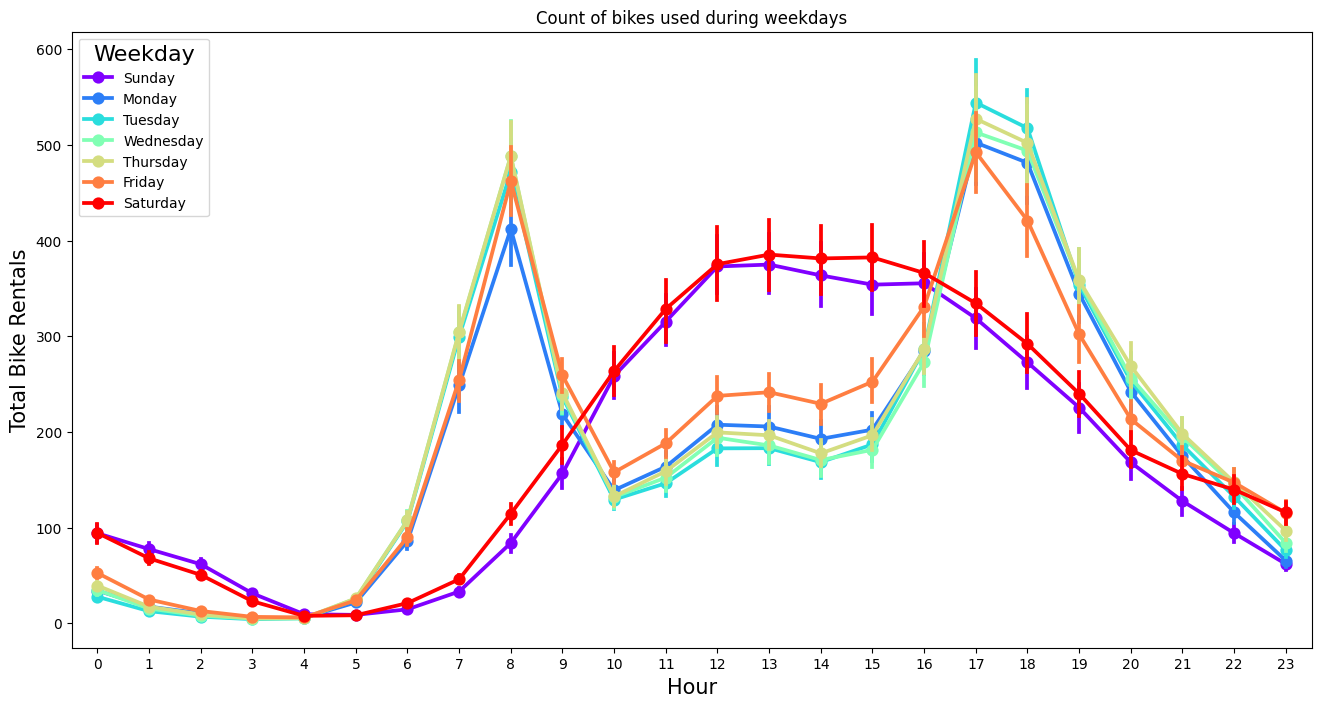

In [12]:
# Create a dictionary to map numeric weekday values to weekday names
weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
custom_cmap = 'rainbow'

fig, ax = plt.subplots(figsize=(16, 8))
sns.pointplot(data=bike_df[['hr', 'cnt', 'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              palette=custom_cmap)

ax.set(title='Count of bikes used during weekdays')
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)

# Customize the legend
legend = ax.legend(title='Weekday', loc='upper left')
legend.set_title('Weekday', prop={'size': 16})

# Change the legend labels using the weekday_labels dictionary
for i, text in enumerate(legend.texts):
    text.set_text(weekday_labels[i])

plt.show()

**Insight:**

- Pola Permintaan di Hari Kerja (Weekday)

  Pagi (pukul 7-9 pagi): Permintaan melonjak signifikan, menunjukkan penggunaan sepeda untuk berangkat kerja atau sekolah.
  
  Siang (pukul 10-15): Permintaan menurun di siang hari, karena sebagian besar orang berada di tempat kerja/sekolah.
  
  Sore (pukul 16-19 sore): Permintaan kembali meningkat, mengindikasikan penggunaan untuk pulang kerja/sekolah.
  
  Malam (pukul 19 ke atas): Permintaan menurun secara bertahap seiring berakhirnya aktivitas harian.

- Pola Permintaan di Akhir Pekan (Weekend)

  Pagi-Siang(pukul 10-15): Permintaan meningkat secara bertahap dari pagi hingga siang hari, menunjukkan penggunaan untuk aktivitas rekreasi dan bersantai. Permintaan mencapai puncaknya di siang hari, ketika orang-orang memiliki lebih banyak waktu luang.
  
  Sore-Malam (pukul 16 ke atas): Permintaan menurun secara perlahan di sore dan malam hari.

- Perbedaan  Weekday vs Weekend:

  Jam Sibuk: Terlihat jelas pada weekday, menunjukkan ketergantungan pada sepeda untuk aktivitas rutin (kerja/sekolah).
  
  Aktivitas Rekreasi: Lebih dominan di weekend, dengan puncak permintaan di siang hari untuk kegiatan santai.
  
  Fleksibilitas Waktu: Penggunaan sepeda di weekend lebih fleksibel, tidak terikat pada jam-jam tertentu seperti di weekday.

### Pertanyaan 2:

Bagaimana cuaca dan musim mempengaruhi permintaan sewa sepeda?

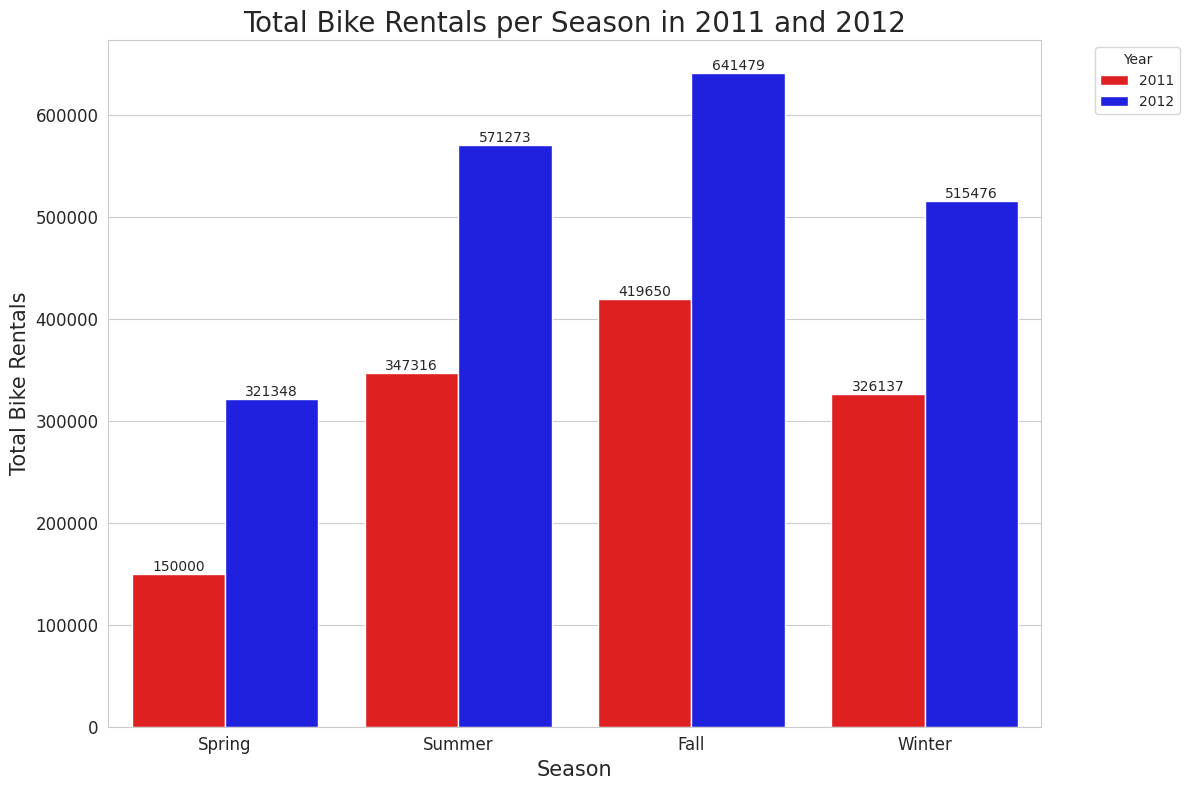

In [13]:
bike_df['season'] = bike_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_df['yr'] = bike_df['yr'].map({0: '2011', 1: '2012'})

# Grouping data by season and year
total_rent_per_season_year = bike_df.groupby(['season', 'yr'])['cnt'].sum().reset_index()

# Define custom color palette
custom_palette = {'2011': 'red', '2012': 'blue'}

# Set the style
sns.set_style('whitegrid')

# Set the figure size
plt.figure(figsize=(12, 8))

# Specify the order of seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

barplot = sns.barplot(x='season',
            y='cnt',
            hue='yr',
            data=total_rent_per_season_year,
            palette=custom_palette,
            order= season_order)

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
      plt.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center',
                 va='bottom',
                 fontsize=10)

plt.title('Total Bike Rentals per Season in 2011 and 2012', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

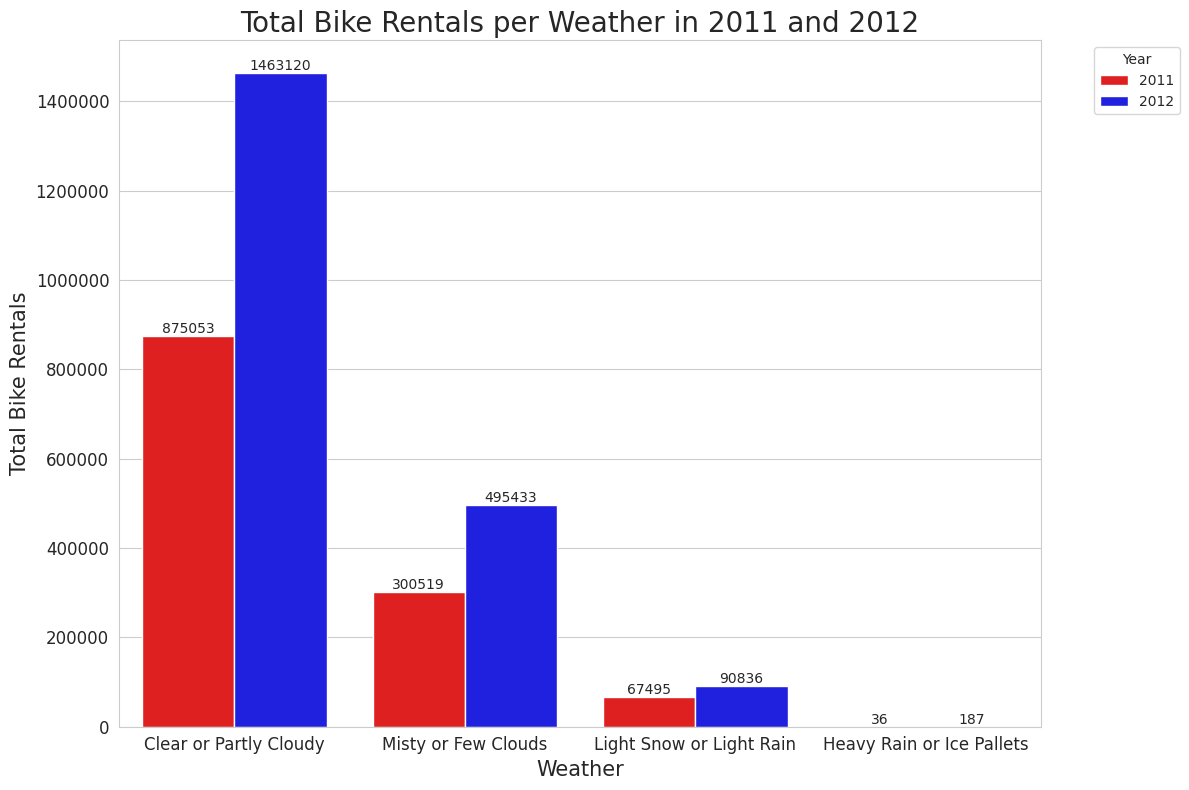

In [15]:
from matplotlib.ticker import ScalarFormatter

bike_df['weathersit'] = bike_df['weathersit'].map({1: 'Clear or Partly Cloudy', 2: 'Misty or Few Clouds', 3: 'Light Snow or Light Rain', 4: 'Heavy Rain or Ice Pallets'})
bike_df['yr'] = bike_df['yr'].map({0: '2011', 1: '2012'})

# Grouping data by weather and year
total_rent_per_weather_year = bike_df.groupby(['weathersit', 'yr'])['cnt'].sum().reset_index()

# Define custom color palette
custom_palette = {'2011': 'red', '2012': 'blue'}

# Set the style
sns.set_style('whitegrid')

# Set the figure size
plt.figure(figsize=(12, 8))

# Specify the order of wheaters
weather_order = ['Clear or Partly Cloudy', 'Misty or Few Clouds', 'Light Snow or Light Rain', 'Heavy Rain or Ice Pallets']

barplot = sns.barplot(x='weathersit',
            y='cnt',
            hue='yr',
            data=total_rent_per_weather_year,
            palette=custom_palette,
            order= weather_order)

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
      plt.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center',
                 va='bottom',
                 fontsize=10)

plt.title('Total Bike Rentals per Weather in 2011 and 2012', fontsize=20)
plt.xlabel('Weather', fontsize=15)
plt.ylabel('Total Bike Rentals', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)

# Add a legend with a title
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Insight:**

- Pengaruh Musim

    Musim Semi (Spring): Permintaan mulai meningkat seiring dengan membaiknya cuaca.

    Musim Panas (Summer): Permintaan relatif tinggi walaupun hari yang terasa panas.
    
    Musim Gugur (Fall): Menunjukkan permintaan tertinggi. Cuaca yang sejuk dan pemandangan alam yang indah membuat bersepeda menjadi aktivitas yang menyenangkan.

    Musim Dingin (Winter): Menunjukkan permintaan terendah karena kondisi cuaca yang dingin, hujan atau bahkan bersalju membuat orang enggan bersepeda.
  

- Pengaruh Cuaca

    Cerah atau Berawan Sebagian ('Clear or Partly Cloudy'): Cuaca cerah paling diminati untuk bersepeda sehingga menghasilkan permintaan yang tertinggi.

    Berkabut atau Sedikit Berawan ('Misty or Few Clouds'): Permintaan masih cukup baik, meskipun menurun dibandingkan dengan saat cuaca cerah.

    Hujan Ringan atau Salju Ringan ('Light Snow or Light Rain'): Permintaan menurun signifikan karena kondisi cuaca yang kurang nyaman.

    Hujan Lebat atau Es ('Heavy Rain or Ice Pallets'): Menunjukkan permintaan terendah karena kondisi cuaca yang ekstrem membuat bersepeda tidak aman.

## Analisis Lanjutan (Opsional)

In [16]:
bike_df = bike_df.rename(columns={'temp': 'temp_x'})

# Membuat kolom baru 'temperature'
bike_df['temperature'] = pd.cut(bike_df['temp_x'], bins=[0, 0.3, 0.6, 1], labels=['cold', 'mid', 'hot'])

# Mengelompokkan data berdasarkan 'temperature'
grouped_data = bike_df.groupby(['temperature'], observed=False)['cnt'].sum().reset_index()

# Menampilkan data yang telah dikelompokkan
print(f"Clustering Based On Temperature")
print(grouped_data)

Clustering Based On Temperature
  temperature      cnt
0        cold   296506
1         mid  1428519
2         hot  1567654


In [17]:
bike_df = bike_df.rename(columns={'hum': 'hum_x'})

# Membuat kolom baru 'humidity'
bike_df['humidity'] = pd.cut(bike_df['hum_x'], bins=[0, 0.3, 0.6, 1], labels=['high', 'medium', 'low'])

# Mengelompokkan data berdasarkan 'humidity'
grouped_data = bike_df.groupby(['humidity'], observed=False)['cnt'].sum().reset_index()

# Menampilkan data yang telah dikelompokkan
print(f"Clustering Based On Humidity")
print(grouped_data)

Clustering Based On Humidity
  humidity      cnt
0     high   222768
1   medium  1704740
2      low  1364548


## Conclusion

- Conclution pertanyaan 1

  Penting bagi penyedia layanan penyewaan sepeda untuk memastikan sepeda tersedia di tempat dan waktu yang tepat. Misalnya, dengan menambah jumlah sepeda di stasiun-stasiun sekitar perkantoran atau sekolah selama jam sibuk di hari kerja, serta di taman atau destinasi wisata pada akhir pekan. Peningkatan permintaan pada hari kerja bisa disebabkan oleh kebutuhan transportasi pekerja dan pelajar, sedangkan pada akhir pekan, banyak orang memanfaatkan waktu luang untuk bersepeda.

- Conclution pertanyaan 2

  Informasi ini dapat dimanfaatkan untuk memprediksi permintaan dan mengatur strategi pemasaran. Sebagai contoh, promosi dapat ditawarkan di musim dingin atau saat cuaca kurang mendukung untuk menarik lebih banyak pengguna. Di sisi lain, layanan penyewaan sepeda harus memastikan ketersediaan sepeda yang memadai selama musim gugur atau saat cuaca cerah, karena permintaan cenderung meningkat. Cuaca yang nyaman dan pemandangan yang indah di musim gugur mendorong lebih banyak orang untuk bersepeda, sementara kondisi cuaca yang ekstrem di musim dingin membuat bersepeda kurang nyaman dan aman.